In [1]:
import cmocean.cm as cm
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
# import statfieldodels.api as sm
import xarray as xr

from salishsea_tools import viz_tools, geo_tools
import netCDF4 as nc
import arrow
import copy
import math
import matplotlib.dates as mdates
from pathlib import Path
import gsw

Paths to collection of obs datasets and load them, and to a specific dataset:

In [2]:
obs_dir = Path("/ocean/atall/MOAD/Obs/PugetSound/ERDDAP/")
obs_file_TW = obs_dir / "L2_gridded_025_TW_20220101-20221231.nc"
ds_obs_TW = xr.open_dataset(obs_file_TW)
obs_file_HS = obs_dir / "L2_gridded_025_HS_20220101-20221231.nc"
ds_obs_HS = xr.open_dataset(obs_file_HS)
obs_file_NB = obs_dir / "L2_gridded_025_NB_20220101-20221231.nc"
ds_obs_NB = xr.open_dataset(obs_file_NB)
obs_file_DB = obs_dir / "L2_gridded_025_DB_20220101-20221231.nc"
ds_obs_DB = xr.open_dataset(obs_file_DB)
obs_file_CI = obs_dir / "L2_gridded_025_CI_20220101-20221231.nc"
ds_obs_CI = xr.open_dataset(obs_file_CI)
obs_file_PW = obs_dir / "L2_gridded_025_PW_20220101-20221231.nc"
ds_obs_PW = xr.open_dataset(obs_file_PW)
ds_obs_PW

<xarray.Dataset>
Dimensions:                                           (cast_start_time: 485,
                                                       sea_water_pressure: 401)
Coordinates:
  * cast_start_time                                   (cast_start_time) datetime64[ns] ...
  * sea_water_pressure                                (sea_water_pressure) float64 ...
Data variables:
    sea_water_temperature                             (cast_start_time, sea_water_pressure) float64 ...
    sea_water_practical_salinity                      (cast_start_time, sea_water_pressure) float64 ...
    sea_water_sigma_theta                             (cast_start_time, sea_water_pressure) float64 ...
    depth                                             (cast_start_time, sea_water_pressure) float64 ...
    mass_concentration_of_chlorophyll_a_in_sea_water  (cast_start_time, sea_water_pressure) float64 ...
    mole_concentration_of_nitrate_in_sea_water        (cast_start_time, sea_water_pressure) float64 ...
    mass_concentration_of_oxygen_in_sea_water         (cast_start_time, sea_water_pressure) float64 ...
Attributes: (12/30)
    author:                    Seth Travis
    buoy_designation:          NPBY1
    buoy_latitude:             47.76116666 degrees N
    buoy_longitude:            -122.39716666 degrees E
    buoy_name:                 Pt. Wells
    buoy_reference_number:     999
    ...                        ...
    license:                   The data may be used and redistributed for fre...
    sourceUrl:                 (local files)
    standard_name_vocabulary:  CF Standard Name Table v70
    summary:                   The Northwest Environmental Moorings program m...
    title:                     NPBY1 - Pt Wells - L2 Pressure Gridded Data - ...
    water_depth:               100 meters

Obs variables

In [3]:
# Twanoh
depth_obs_TW = ds_obs_TW.depth.sel()
time_obs_TW = ds_obs_TW.cast_start_time.sel()
oxy_obs_TW = ds_obs_TW.mass_concentration_of_oxygen_in_sea_water.sel() * 44.64
chl_obs_TW = ds_obs_TW.mass_concentration_of_chlorophyll_a_in_sea_water.sel()
no3_obs_TW = ds_obs_TW.mole_concentration_of_nitrate_in_sea_water.sel()
salt_obs_TW = gsw.SR_from_SP(ds_obs_TW.sea_water_practical_salinity.sel()) # from practical to ref salinity (g/kg)
temp_obs_TW = gsw.CT_from_t(salt_obs_TW, ds_obs_TW.sea_water_temperature.sel(), ds_obs_TW.sea_water_pressure.sel()) # from in-situ temp to cons temp
# Hoodsport
depth_obs_HS = ds_obs_HS.depth.sel()
time_obs_HS = ds_obs_HS.cast_start_time.sel()
oxy_obs_HS = ds_obs_HS.mass_concentration_of_oxygen_in_sea_water.sel() * 44.64
chl_obs_HS = ds_obs_HS.mass_concentration_of_chlorophyll_a_in_sea_water.sel()
no3_obs_HS = ds_obs_HS.mole_concentration_of_nitrate_in_sea_water.sel()
salt_obs_HS = gsw.SR_from_SP(ds_obs_HS.sea_water_practical_salinity.sel()) # from practical to ref salinity (g/kg)
temp_obs_HS = gsw.CT_from_t(salt_obs_HS, ds_obs_HS.sea_water_temperature.sel(), ds_obs_HS.sea_water_pressure.sel()) # from in-situ temp to cons temp
# NorthBuoy
depth_obs_NB = ds_obs_NB.depth.sel()
time_obs_NB = ds_obs_NB.cast_start_time.sel()
oxy_obs_NB = ds_obs_NB.mass_concentration_of_oxygen_in_sea_water.sel() * 44.64
chl_obs_NB = ds_obs_NB.mass_concentration_of_chlorophyll_a_in_sea_water.sel()
no3_obs_NB = ds_obs_NB.mole_concentration_of_nitrate_in_sea_water.sel()
salt_obs_NB = gsw.SR_from_SP(ds_obs_NB.sea_water_practical_salinity.sel()) # from practical to ref salinity (g/kg)
temp_obs_NB = gsw.CT_from_t(salt_obs_NB, ds_obs_NB.sea_water_temperature.sel(), ds_obs_NB.sea_water_pressure.sel()) # from in-situ temp to cons temp
# Dabob bay
depth_obs_DB = ds_obs_DB.depth.sel()
time_obs_DB = ds_obs_DB.cast_start_time.sel()
oxy_obs_DB = ds_obs_DB.mass_concentration_of_oxygen_in_sea_water.sel() * 44.64
chl_obs_DB = ds_obs_DB.mass_concentration_of_chlorophyll_a_in_sea_water.sel()
no3_obs_DB = ds_obs_DB.mole_concentration_of_nitrate_in_sea_water.sel()
salt_obs_DB = gsw.SR_from_SP(ds_obs_DB.sea_water_practical_salinity.sel()) # from practical to ref salinity (g/kg)
temp_obs_DB = gsw.CT_from_t(salt_obs_DB, ds_obs_DB.sea_water_temperature.sel(), ds_obs_DB.sea_water_pressure.sel()) # from in-situ temp to cons temp
# Carr Inlet
depth_obs_CI = ds_obs_CI.depth.sel()
time_obs_CI = ds_obs_CI.cast_start_time.sel()
oxy_obs_CI = ds_obs_CI.mass_concentration_of_oxygen_in_sea_water.sel() * 44.64
chl_obs_CI = ds_obs_CI.mass_concentration_of_chlorophyll_a_in_sea_water.sel()
no3_obs_CI = ds_obs_CI.mole_concentration_of_nitrate_in_sea_water.sel()
salt_obs_CI = gsw.SR_from_SP(ds_obs_CI.sea_water_practical_salinity.sel())
temp_obs_CI = gsw.CT_from_t(salt_obs_CI, ds_obs_CI.sea_water_temperature.sel(), ds_obs_CI.sea_water_pressure.sel()) # from in-situ temp to cons temp
# Point Wells
depth_obs_PW = ds_obs_PW.depth.sel()
time_obs_PW = ds_obs_PW.cast_start_time.sel()
oxy_obs_PW = ds_obs_PW.mass_concentration_of_oxygen_in_sea_water.sel() * 44.64
chl_obs_PW = ds_obs_PW.mass_concentration_of_chlorophyll_a_in_sea_water.sel()
no3_obs_PW = ds_obs_PW.mole_concentration_of_nitrate_in_sea_water.sel()
salt_obs_PW = gsw.SR_from_SP(ds_obs_PW.sea_water_practical_salinity.sel()) # from practical to ref salinity (g/kg)
temp_obs_PW = gsw.CT_from_t(salt_obs_PW, ds_obs_PW.sea_water_temperature.sel(), ds_obs_PW.sea_water_pressure.sel()) # from in-situ temp to cons temp




Buoys position :  https://nwem.apl.washington.edu/prod_PugetSound.shtml

In [4]:
mycmap = copy.copy(cm.oxy)
mycmap.set_bad('darkgreen')

In [5]:
with xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc') as mesh:
    tmask = mesh.tmask
    mbathy = mesh.mbathy

In [6]:
# Constant and data rang
syear = 2022
eyear = 2022
smonth = 1
emonth = 12
startdate = arrow.get(syear, smonth, 1)
enddate = arrow.get(eyear, emonth, 31)
print (startdate, enddate)

2022-01-01T00:00:00+00:00 2022-12-31T00:00:00+00:00


In [7]:
with xr.open_dataset('/results2/SalishSea/nowcast-green.202111/01apr23/SalishSea_1d_20230401_20230401_chem_T.nc') as data_chem:
    oxy = data_chem['dissolved_oxygen']
with xr.open_dataset('/results2/SalishSea/nowcast-green.202111/01apr23/SalishSea_1d_20230401_20230401_biol_T.nc') as data_biol:
    no3 = data_biol['nitrate']
    don = data_biol['dissolved_organic_nitrogen']
    pon = data_biol['particulate_organic_nitrogen']
    dia = data_biol['diatoms']
    fla = data_biol['flagellates']
with xr.open_dataset('/results2/SalishSea/nowcast-green.202111/01apr23/SalishSea_1d_20230401_20230401_grid_T.nc') as data_grid:
    temp = data_grid['votemper']
    salt = data_grid['vosaline']
#    dens = data_grid['sigma_theta'] # almost same as salinity

In [8]:
tmask2_oxy = tmask.assign_coords(z=("z", oxy.deptht.data))
tmask2_oxy = tmask2_oxy.rename({"z": "deptht"})
tmask2_no3 = tmask.assign_coords(z=("z", no3.deptht.data))
tmask2_no3 = tmask2_no3.rename({"z": "deptht"})
tmask2_dia = tmask.assign_coords(z=("z", dia.deptht.data))
tmask2_dia = tmask2_dia.rename({"z": "deptht"})
tmask2_fla = tmask.assign_coords(z=("z", fla.deptht.data))
tmask2_fla = tmask2_fla.rename({"z": "deptht"})
tmask2_temp = tmask.assign_coords(z=("z", temp.deptht.data))
tmask2_temp = tmask2_temp.rename({"z": "deptht"})
tmask2_salt = tmask.assign_coords(z=("z", salt.deptht.data))
tmask2_salt = tmask2_salt.rename({"z": "deptht"})


In [9]:
print (oxy.deptht)

<xarray.DataArray 'deptht' (deptht: 40)>
array([  0.5     ,   1.500003,   2.500011,   3.500031,   4.500071,   5.500151,
         6.50031 ,   7.500623,   8.501236,   9.502433,  10.504766,  11.509312,
        12.518167,  13.535412,  14.568982,  15.634288,  16.761173,  18.007135,
        19.481785,  21.389978,  24.100256,  28.229916,  34.685757,  44.517723,
        58.484333,  76.58559 ,  98.06296 , 121.866516, 147.08946 , 173.11449 ,
       199.57304 , 226.2603  , 253.06664 , 279.93454 , 306.8342  , 333.75018 ,
       360.67453 , 387.6032  , 414.5341  , 441.4661  ], dtype=float32)
Coordinates:
  * deptht   (deptht) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
Attributes:
    standard_name:  sea_floor_depth
    long_name:      Sea Floor Depth
    units:          metres
    positive:       down


Buoy position in 202111 (4x4 pixels around)

In [10]:
#i1, i2, j1, j2 = (95, 200, 68, 160)  # Hood Canal all
i1pw, i2pw, j1pw, j2pw = (257, 260, 102, 105)  # Point Wells 47.761N, -122.3972W 100 meters depth
i1ci, i2ci, j1ci, j2ci = (151, 154, 29,32)  # Carr Inlet - 47.28N, -122.728W 47 meters depth
i1db, i2db, j1db, j2db = (204, 207, 140, 143)  # Babob bay 47.8034N, -122.8029W 100 meters depth
i1nb, i2nb, j1nb, j2nb = (241, 244, 147, 150)  # Northbuoy (Hansville)
i1hs, i2hs, j1hs, j2hs = (107, 110, 83, 86)           # Hoodsport buoy point in Lynch Cove (Hood Canal) - 47.4218N, -123.1126W 120 meters depth
i1lc, i2lc, j1lc, j2lc = (122, 125, 70, 73)  # Twanoh buoy point in Lynch Cove (Hood Canal) - 47.375N, -123.0083W 35 meters depth

#(j1lc,i1lc)=geo_tools.find_closest_model_point(-123.008, 47.375, grid='GEM2.5')

In [11]:
first = True
for ii, day in enumerate(arrow.Arrow.range('day', startdate, enddate)):
    year = day.year
    yr2 = day.strftime("%y")
    month = day.month
    Month = day.strftime("%b").lower()
    day = day.day
    # set up filename to follow NEMO conventions
    filename_chem = f'/results2/SalishSea/nowcast-green.202111/{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_chem_T.nc'
    with xr.open_dataset(filename_chem) as ds_chem:
        oxyhs = ds_chem['dissolved_oxygen'][0, :, j1hs:j2hs, i1hs:i2hs].where(tmask2_oxy[0, :, j1hs:j2hs, i1hs:i2hs] == 1).mean(axis=1).mean(axis=1)
        oxylc = ds_chem['dissolved_oxygen'][0, :, j1lc:j2lc, i1lc:i2lc].where(tmask2_oxy[0, :, j1lc:j2lc, i1lc:i2lc] == 1).mean(axis=1).mean(axis=1)
        oxynb = ds_chem['dissolved_oxygen'][0, :, j1nb:j2nb, i1nb:i2nb].where(tmask2_oxy[0, :, j1nb:j2nb, i1nb:i2nb] == 1).mean(axis=1).mean(axis=1)
        oxydb = ds_chem['dissolved_oxygen'][0, :, j1db:j2db, i1db:i2db].where(tmask2_oxy[0, :, j1db:j2db, i1db:i2db] == 1).mean(axis=1).mean(axis=1)
        oxyci = ds_chem['dissolved_oxygen'][0, :, j1ci:j2ci, i1ci:i2ci].where(tmask2_oxy[0, :, j1ci:j2ci, i1ci:i2ci] == 1).mean(axis=1).mean(axis=1)
        oxypw = ds_chem['dissolved_oxygen'][0, :, j1pw:j2pw, i1pw:i2pw].where(tmask2_oxy[0, :, j1pw:j2pw, i1pw:i2pw] == 1).mean(axis=1).mean(axis=1)
        if first:
            first = False
            oxyhs_ts = oxyhs
            oxylc_ts = oxylc
            oxynb_ts = oxynb
            oxydb_ts = oxydb
            oxyci_ts = oxyci
            oxypw_ts = oxypw
        else:
            oxyhs_ts = xr.concat([oxyhs_ts, oxyhs], dim='time_counter')
            oxylc_ts = xr.concat([oxylc_ts, oxylc], dim='time_counter')
            oxynb_ts = xr.concat([oxynb_ts, oxynb], dim='time_counter')
            oxydb_ts = xr.concat([oxydb_ts, oxydb], dim='time_counter')
            oxyci_ts = xr.concat([oxyci_ts, oxyci], dim='time_counter')
            oxypw_ts = xr.concat([oxypw_ts, oxypw], dim='time_counter')

In [12]:
no3_obs_HS.shape


(478, 481)

In [13]:
first = True
for ii, day in enumerate(arrow.Arrow.range('day', startdate, enddate)):
    year = day.year
    yr2 = day.strftime("%y")
    month = day.month
    Month = day.strftime("%b").lower()
    day = day.day
    # set up filename to follow NEMO conventions
    filename_biol = f'/results2/SalishSea/nowcast-green.202111/{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_biol_T.nc'
    with xr.open_dataset(filename_biol) as ds_biol:
        no3hs = ds_biol['nitrate'][0, :, j1hs:j2hs, i1hs:i2hs].where(tmask2_no3[0, :, j1hs:j2hs, i1hs:i2hs] == 1).mean(axis=1).mean(axis=1)
        no3lc = ds_biol['nitrate'][0, :, j1lc:j2lc, i1lc:i2lc].where(tmask2_no3[0, :, j1lc:j2lc, i1lc:i2lc] == 1).mean(axis=1).mean(axis=1)
        no3nb = ds_biol['nitrate'][0, :, j1nb:j2nb, i1nb:i2nb].where(tmask2_no3[0, :, j1nb:j2nb, i1nb:i2nb] == 1).mean(axis=1).mean(axis=1)
        no3db = ds_biol['nitrate'][0, :, j1db:j2db, i1db:i2db].where(tmask2_no3[0, :, j1db:j2db, i1db:i2db] == 1).mean(axis=1).mean(axis=1)
        no3ci = ds_biol['nitrate'][0, :, j1ci:j2ci, i1ci:i2ci].where(tmask2_no3[0, :, j1ci:j2ci, i1ci:i2ci] == 1).mean(axis=1).mean(axis=1)
        no3pw = ds_biol['nitrate'][0, :, j1pw:j2pw, i1pw:i2pw].where(tmask2_no3[0, :, j1pw:j2pw, i1pw:i2pw] == 1).mean(axis=1).mean(axis=1)

        dialc = ds_biol['diatoms'][0, :, j1lc:j2lc, i1lc:i2lc].where(tmask2_dia[0, :, j1lc:j2lc, i1lc:i2lc] == 1).mean(axis=1).mean(axis=1)
        diahs = ds_biol['diatoms'][0, :, j1hs:j2hs, i1hs:i2hs].where(tmask2_dia[0, :, j1hs:j2hs, i1hs:i2hs] == 1).mean(axis=1).mean(axis=1)
        dianb = ds_biol['diatoms'][0, :, j1nb:j2nb, i1nb:i2nb].where(tmask2_dia[0, :, j1nb:j2nb, i1nb:i2nb] == 1).mean(axis=1).mean(axis=1)
        diadb = ds_biol['diatoms'][0, :, j1db:j2db, i1db:i2db].where(tmask2_dia[0, :, j1db:j2db, i1db:i2db] == 1).mean(axis=1).mean(axis=1)
        diaci = ds_biol['diatoms'][0, :, j1ci:j2ci, i1ci:i2ci].where(tmask2_dia[0, :, j1ci:j2ci, i1ci:i2ci] == 1).mean(axis=1).mean(axis=1)
        diapw = ds_biol['diatoms'][0, :, j1pw:j2pw, i1pw:i2pw].where(tmask2_dia[0, :, j1pw:j2pw, i1pw:i2pw] == 1).mean(axis=1).mean(axis=1)

        flalc = ds_biol['flagellates'][0, :, j1lc:j2lc, i1lc:i2lc].where(tmask2_fla[0, :, j1lc:j2lc, i1lc:i2lc] == 1).mean(axis=1).mean(axis=1)
        flahs = ds_biol['flagellates'][0, :, j1hs:j2hs, i1hs:i2hs].where(tmask2_fla[0, :, j1hs:j2hs, i1hs:i2hs] == 1).mean(axis=1).mean(axis=1)
        flanb = ds_biol['flagellates'][0, :, j1nb:j2nb, i1nb:i2nb].where(tmask2_fla[0, :, j1nb:j2nb, i1nb:i2nb] == 1).mean(axis=1).mean(axis=1)
        fladb = ds_biol['flagellates'][0, :, j1db:j2db, i1db:i2db].where(tmask2_fla[0, :, j1db:j2db, i1db:i2db] == 1).mean(axis=1).mean(axis=1)
        flaci = ds_biol['flagellates'][0, :, j1ci:j2ci, i1ci:i2ci].where(tmask2_fla[0, :, j1ci:j2ci, i1ci:i2ci] == 1).mean(axis=1).mean(axis=1)
        flapw = ds_biol['flagellates'][0, :, j1pw:j2pw, i1pw:i2pw].where(tmask2_fla[0, :, j1pw:j2pw, i1pw:i2pw] == 1).mean(axis=1).mean(axis=1)

        if first:
            first = False
            no3hs_ts = no3hs
            no3lc_ts = no3lc
            no3nb_ts = no3nb
            no3db_ts = no3db
            no3ci_ts = no3ci
            no3pw_ts = no3pw

            dialc_ts = dialc
            diahs_ts = diahs
            dianb_ts = dianb
            diadb_ts = diadb
            diaci_ts = diaci
            diapw_ts = diapw

            flalc_ts = flalc
            flahs_ts = flahs
            flanb_ts = flanb
            fladb_ts = fladb
            flaci_ts = flaci
            flapw_ts = flapw
        else:
            no3hs_ts = xr.concat([no3hs_ts, no3hs], dim='time_counter')
            no3lc_ts = xr.concat([no3lc_ts, no3lc], dim='time_counter')
            no3nb_ts = xr.concat([no3nb_ts, no3nb], dim='time_counter')
            no3db_ts = xr.concat([no3db_ts, no3db], dim='time_counter')
            no3ci_ts = xr.concat([no3ci_ts, no3ci], dim='time_counter')
            no3pw_ts = xr.concat([no3pw_ts, no3pw], dim='time_counter')

            dialc_ts = xr.concat([dialc_ts, dialc], dim='time_counter')
            diahs_ts = xr.concat([diahs_ts, diahs], dim='time_counter')
            dianb_ts = xr.concat([dianb_ts, dianb], dim='time_counter')
            diadb_ts = xr.concat([diadb_ts, diadb], dim='time_counter')
            diaci_ts = xr.concat([diaci_ts, diaci], dim='time_counter')
            diapw_ts = xr.concat([diapw_ts, diapw], dim='time_counter')

            flalc_ts = xr.concat([flalc_ts, flalc], dim='time_counter')
            diahs_ts = xr.concat([diahs_ts, diahs], dim='time_counter')
            flanb_ts = xr.concat([flanb_ts, flanb], dim='time_counter')
            diadb_ts = xr.concat([diadb_ts, diadb], dim='time_counter')
            flaci_ts = xr.concat([flaci_ts, flaci], dim='time_counter')
            diapw_ts = xr.concat([diapw_ts, diapw], dim='time_counter')

In [14]:
chllc_ts = (dialc_ts + flalc_ts) * 2
chlhs_ts = (diahs_ts + flahs_ts) * 2
chlnb_ts = (dianb_ts + flanb_ts) * 2
chldb_ts = (diadb_ts + fladb_ts) * 2
chlci_ts = (diaci_ts + flaci_ts) * 2
chlpw_ts = (diapw_ts + flapw_ts) * 2

In [15]:
first = True
for ii, day in enumerate(arrow.Arrow.range('day', startdate, enddate)):
    year = day.year
    yr2 = day.strftime("%y")
    month = day.month
    Month = day.strftime("%b").lower()
    day = day.day
    # set up filename to follow NEMO conventions
    filename_grid = f'/results2/SalishSea/nowcast-green.202111/{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_grid_T.nc'
    with xr.open_dataset(filename_grid) as ds_grid:
        temphs = ds_grid['votemper'][0, :, j1hs:j2hs, i1hs:i2hs].where(tmask2_temp[0, :, j1hs:j2hs, i1hs:i2hs] == 1).mean(axis=1).mean(axis=1)
        templc = ds_grid['votemper'][0, :, j1lc:j2lc, i1lc:i2lc].where(tmask2_temp[0, :, j1lc:j2lc, i1lc:i2lc] == 1).mean(axis=1).mean(axis=1)
        tempnb = ds_grid['votemper'][0, :, j1nb:j2nb, i1nb:i2nb].where(tmask2_temp[0, :, j1nb:j2nb, i1nb:i2nb] == 1).mean(axis=1).mean(axis=1)
        tempdb = ds_grid['votemper'][0, :, j1db:j2db, i1db:i2db].where(tmask2_temp[0, :, j1db:j2db, i1db:i2db] == 1).mean(axis=1).mean(axis=1)
        tempci = ds_grid['votemper'][0, :, j1ci:j2ci, i1ci:i2ci].where(tmask2_temp[0, :, j1ci:j2ci, i1ci:i2ci] == 1).mean(axis=1).mean(axis=1)
        temppw = ds_grid['votemper'][0, :, j1pw:j2pw, i1pw:i2pw].where(tmask2_temp[0, :, j1pw:j2pw, i1pw:i2pw] == 1).mean(axis=1).mean(axis=1)
    
        salths = ds_grid['vosaline'][0, :, j1hs:j2hs, i1hs:i2hs].where(tmask2_salt[0, :, j1hs:j2hs, i1hs:i2hs] == 1).mean(axis=1).mean(axis=1)
        saltlc = ds_grid['vosaline'][0, :, j1lc:j2lc, i1lc:i2lc].where(tmask2_salt[0, :, j1lc:j2lc, i1lc:i2lc] == 1).mean(axis=1).mean(axis=1)
        saltnb = ds_grid['vosaline'][0, :, j1nb:j2nb, i1nb:i2nb].where(tmask2_salt[0, :, j1nb:j2nb, i1nb:i2nb] == 1).mean(axis=1).mean(axis=1)
        saltdb = ds_grid['vosaline'][0, :, j1db:j2db, i1db:i2db].where(tmask2_salt[0, :, j1db:j2db, i1db:i2db] == 1).mean(axis=1).mean(axis=1)
        saltci = ds_grid['vosaline'][0, :, j1ci:j2ci, i1ci:i2ci].where(tmask2_salt[0, :, j1ci:j2ci, i1ci:i2ci] == 1).mean(axis=1).mean(axis=1)
        saltpw = ds_grid['vosaline'][0, :, j1pw:j2pw, i1pw:i2pw].where(tmask2_salt[0, :, j1pw:j2pw, i1pw:i2pw] == 1).mean(axis=1).mean(axis=1)
        
        if first:
            first = False
            temphs_ts = temphs
            templc_ts = templc
            tempnb_ts = tempnb
            tempdb_ts = tempdb
            tempci_ts = tempci
            temppw_ts = temppw

            salths_ts = salths
            saltlc_ts = saltlc
            saltnb_ts = saltnb
            saltdb_ts = saltdb
            saltci_ts = saltci
            saltpw_ts = saltpw
        else:
            temphs_ts = xr.concat([temphs_ts, temphs], dim='time_counter')
            templc_ts = xr.concat([templc_ts, templc], dim='time_counter')
            tempnb_ts = xr.concat([tempnb_ts, tempnb], dim='time_counter')
            tempdb_ts = xr.concat([tempdb_ts, tempdb], dim='time_counter')
            tempci_ts = xr.concat([tempci_ts, tempci], dim='time_counter')
            temppw_ts = xr.concat([temppw_ts, temppw], dim='time_counter')

            salths_ts = xr.concat([salths_ts, salths], dim='time_counter')
            saltlc_ts = xr.concat([saltlc_ts, saltlc], dim='time_counter')
            saltnb_ts = xr.concat([saltnb_ts, saltnb], dim='time_counter')
            saltdb_ts = xr.concat([saltdb_ts, saltdb], dim='time_counter')
            saltci_ts = xr.concat([saltci_ts, saltci], dim='time_counter')
            saltpw_ts = xr.concat([saltpw_ts, saltpw], dim='time_counter')

Twanoh in Lynch Cove - Hood Canal

Twanoh in Lynch Cove - Hood Canal 2022-01-01T00:00:00+00:00 2022-12-31T00:00:00+00:00


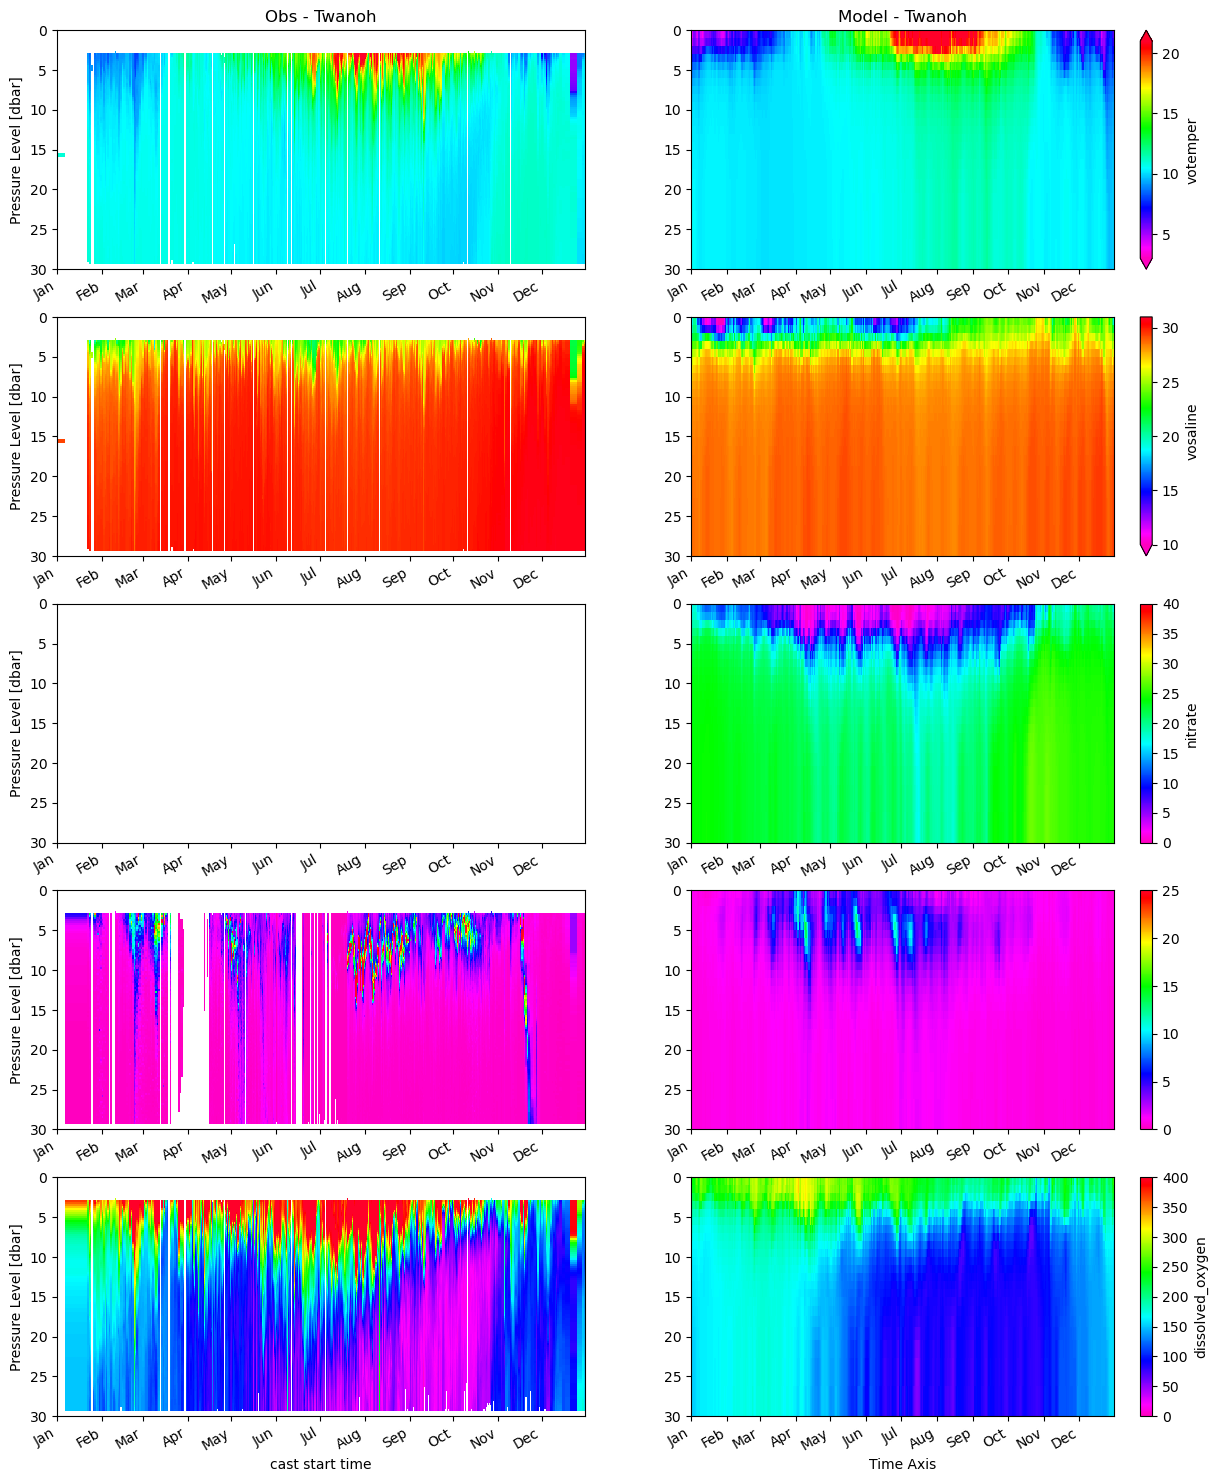

In [16]:
fig, ax = plt.subplots(5, 2, figsize=(15, 18))
temp_obs_TW.plot(ax=ax[0, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=3, vmax=21, ylim=(30, 0), xlim=(startdate, enddate));
salt_obs_TW.plot(ax=ax[1, 0], y="sea_water_pressure", yincrease=False, cmap= 'gist_rainbow_r', add_colorbar=False, vmin=10, vmax=31, ylim=(30, 0), xlim=(startdate, enddate));
no3_obs_TW.plot(ax=ax[2, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=0, vmax=40, ylim=(30, 0), xlim=(startdate, enddate));
chl_obs_TW.plot(ax=ax[3, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=0, vmax=25, ylim=(30, 0), xlim=(startdate, enddate));
oxy_obs_TW.plot(ax=ax[4, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=0, vmax=400, ylim=(30, 0), xlim=(startdate, enddate));

templc_ts[:, :24].plot(ax=ax[0, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=3, vmax=21, ylim=(30, 0), xlim=(startdate, enddate));
saltlc_ts[:, :24].plot(ax=ax[1, 1], y="deptht", yincrease=False, cmap= 'gist_rainbow_r', vmin=10, vmax=31, ylim=(30, 0), xlim=(startdate, enddate));
no3lc_ts[:, :24].plot(ax=ax[2, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=0, vmax=40, ylim=(30, 0), xlim=(startdate, enddate));
chllc_ts[:, :24].plot(ax=ax[3, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=0, vmax=25, ylim=(30, 0), xlim=(startdate, enddate));
oxylc_ts[:, :24].plot(ax=ax[4, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=0, vmax=400, ylim=(30, 0), xlim=(startdate, enddate));

ax[0, 1].set_ylabel('')
ax[1, 1].set_ylabel('')
ax[2, 1].set_ylabel('')
ax[3, 1].set_ylabel('')
ax[4, 1].set_ylabel('')
ax[0, 0].set_xlabel('')
ax[1, 0].set_xlabel('')
ax[2, 0].set_xlabel('')
ax[3, 0].set_xlabel('')
ax[0, 1].set_xlabel('')
ax[1, 1].set_xlabel('')
ax[2, 1].set_xlabel('')
ax[3, 1].set_xlabel('')

ax[0, 0].set_title('Obs - Twanoh')
ax[0, 1].set_title('Model - Twanoh')

# Make ticks on occurrences of each month:
ax[0, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[1, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[2, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[3, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[4, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[2, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[3, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[4, 1].xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[2, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[3, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[4, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[2, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[3, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[4, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

print('Twanoh in Lynch Cove - Hood Canal', startdate, enddate)

Hoodsport - central Hood Canal

Hoodsport in central Hood Canal 2022-01-01T00:00:00+00:00 2022-12-31T00:00:00+00:00


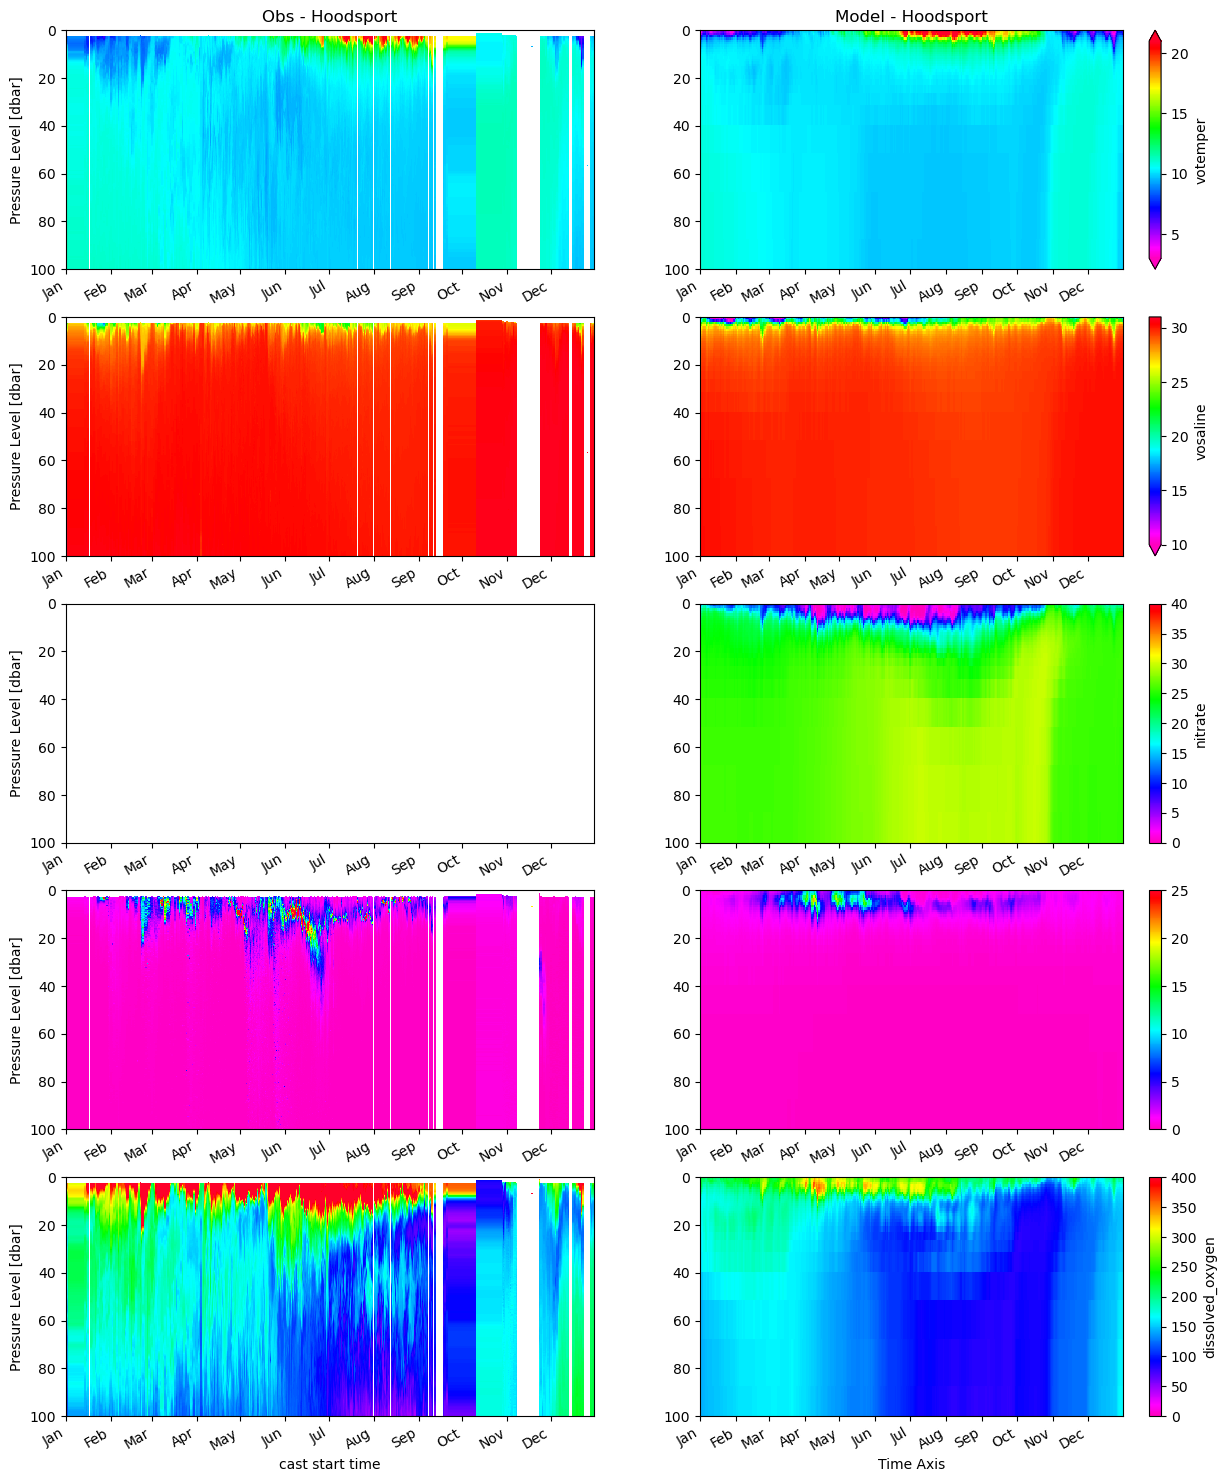

In [22]:
fig, ax = plt.subplots(5, 2, figsize=(15, 18))
temp_obs_HS.plot(ax=ax[0, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=3, vmax=21, ylim=(100, 0), xlim=(startdate, enddate));
salt_obs_HS.plot(ax=ax[1, 0], y="sea_water_pressure", yincrease=False, cmap= 'gist_rainbow_r', add_colorbar=False, vmin=10, vmax=31, ylim=(100, 0), xlim=(startdate, enddate));
no3_obs_HS.plot(ax=ax[2, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=0, vmax=40, ylim=(100, 0), xlim=(startdate, enddate));
chl_obs_HS.plot(ax=ax[3, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=0, vmax=25, ylim=(100, 0), xlim=(startdate, enddate));
oxy_obs_HS.plot(ax=ax[4, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=0, vmax=400, ylim=(100, 0), xlim=(startdate, enddate));

temphs_ts.plot(ax=ax[0, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=3, vmax=21, ylim=(100, 0), xlim=(startdate, enddate));
salths_ts.plot(ax=ax[1, 1], y="deptht", yincrease=False, cmap= 'gist_rainbow_r', vmin=10, vmax=31, ylim=(100, 0), xlim=(startdate, enddate));
no3hs_ts.plot(ax=ax[2, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=0, vmax=40, ylim=(100, 0), xlim=(startdate, enddate));
chlhs_ts.plot(ax=ax[3, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=0, vmax=25, ylim=(100, 0), xlim=(startdate, enddate));
oxyhs_ts.plot(ax=ax[4, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=0, vmax=400, ylim=(100, 0), xlim=(startdate, enddate));

ax[0, 1].set_ylabel('')
ax[1, 1].set_ylabel('')
ax[2, 1].set_ylabel('')
ax[3, 1].set_ylabel('')
ax[4, 1].set_ylabel('')
ax[0, 0].set_xlabel('')
ax[1, 0].set_xlabel('')
ax[2, 0].set_xlabel('')
ax[3, 0].set_xlabel('')
ax[0, 1].set_xlabel('')
ax[1, 1].set_xlabel('')
ax[2, 1].set_xlabel('')
ax[3, 1].set_xlabel('')

ax[0, 0].set_title('Obs - Hoodsport')
ax[0, 1].set_title('Model - Hoodsport')

# Make ticks on occurrences of each month:
ax[0, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[1, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[2, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[3, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[4, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[2, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[3, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[4, 1].xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[2, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[3, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[4, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[2, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[3, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[4, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

print('Hoodsport in central Hood Canal', startdate, enddate)

Dabob bay - Hood Canal

Dabob bay - Hood Canal 2022-01-01T00:00:00+00:00 2022-12-31T00:00:00+00:00


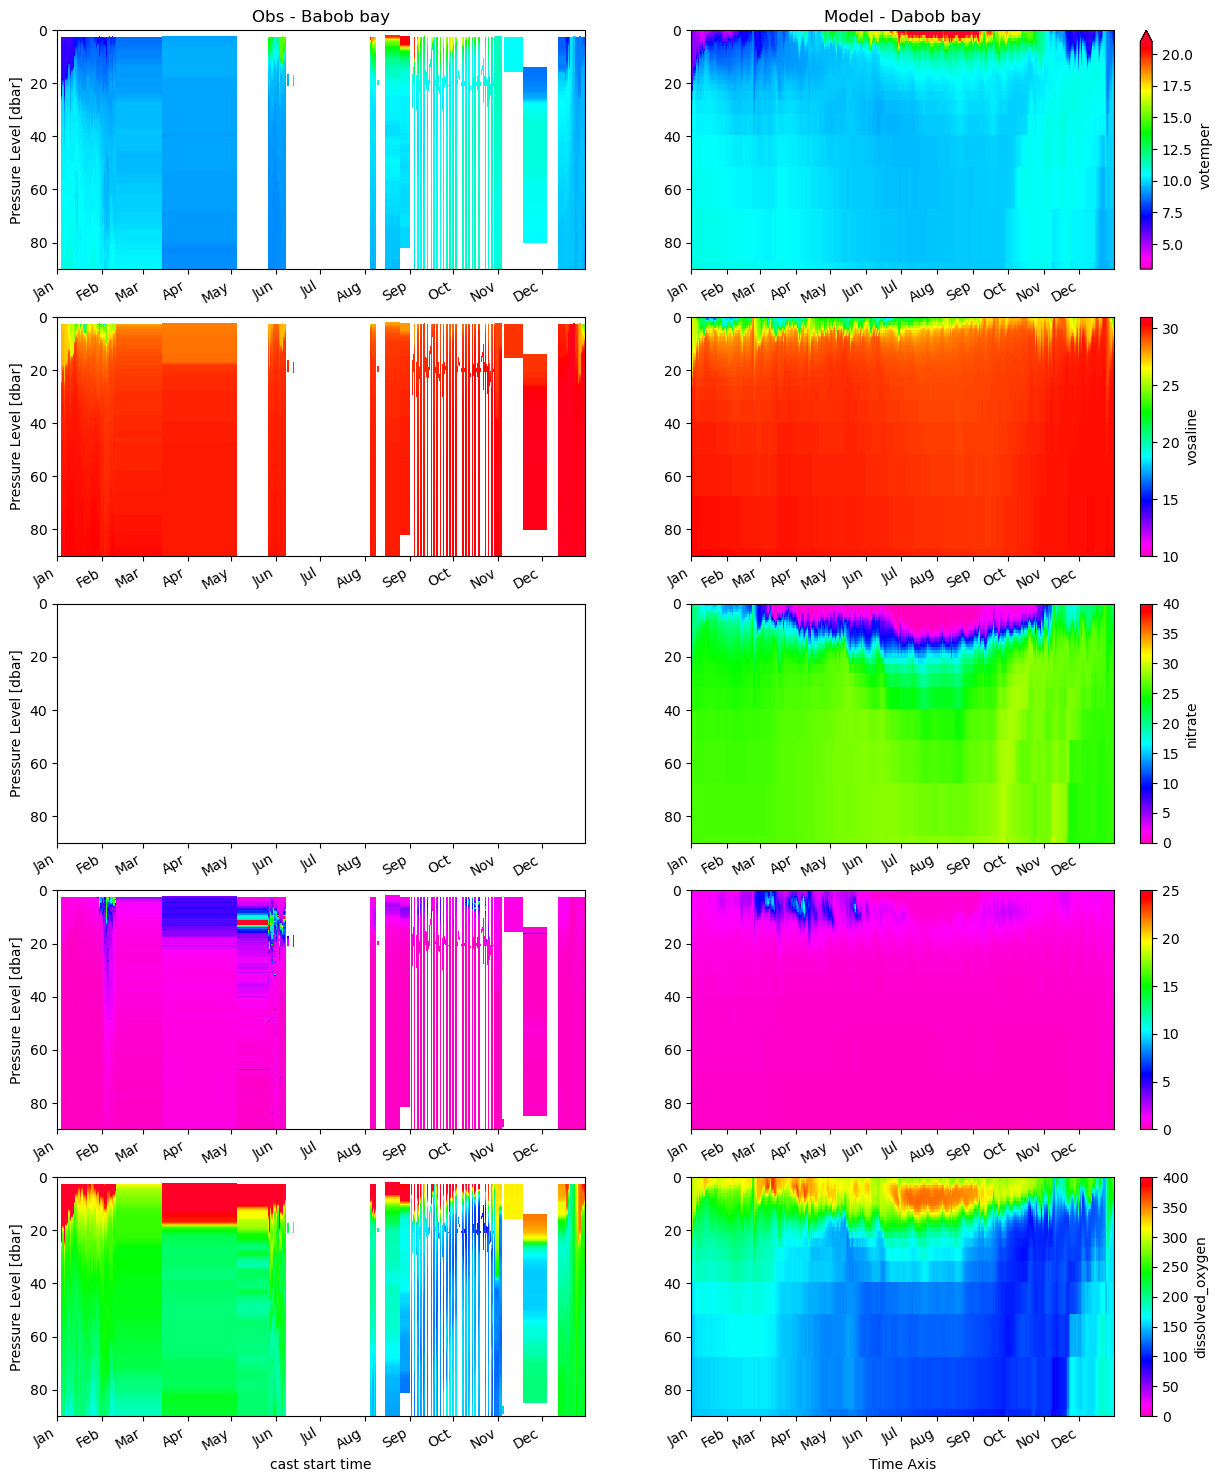

In [18]:
fig, ax = plt.subplots(5, 2, figsize=(15, 18))
temp_obs_DB.plot(ax=ax[0, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=3, vmax=21, ylim=(90, 0), xlim=(startdate, enddate));
salt_obs_DB.plot(ax=ax[1, 0], y="sea_water_pressure", yincrease=False, cmap= 'gist_rainbow_r', add_colorbar=False, vmin=10, vmax=31, ylim=(90, 0), xlim=(startdate, enddate));
no3_obs_DB.plot(ax=ax[2, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=0, vmax=40, ylim=(90, 0), xlim=(startdate, enddate));
chl_obs_DB.plot(ax=ax[3, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=0, vmax=25, ylim=(90, 0), xlim=(startdate, enddate));
oxy_obs_DB.plot(ax=ax[4, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=0, vmax=400, ylim=(90, 0), xlim=(startdate, enddate));

tempdb_ts.plot(ax=ax[0, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=3, vmax=21, ylim=(90, 0), xlim=(startdate, enddate));
saltdb_ts.plot(ax=ax[1, 1], y="deptht", yincrease=False, cmap= 'gist_rainbow_r', vmin=10, vmax=31, ylim=(90, 0), xlim=(startdate, enddate));
no3db_ts.plot(ax=ax[2, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=0, vmax=40, ylim=(90, 0), xlim=(startdate, enddate));
chldb_ts.plot(ax=ax[3, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=0, vmax=25, ylim=(90, 0), xlim=(startdate, enddate));
oxydb_ts.plot(ax=ax[4, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=0, vmax=400, ylim=(90, 0), xlim=(startdate, enddate));

ax[0, 1].set_ylabel('')
ax[1, 1].set_ylabel('')
ax[2, 1].set_ylabel('')
ax[3, 1].set_ylabel('')
ax[4, 1].set_ylabel('')
ax[0, 0].set_xlabel('')
ax[1, 0].set_xlabel('')
ax[2, 0].set_xlabel('')
ax[3, 0].set_xlabel('')
ax[0, 1].set_xlabel('')
ax[1, 1].set_xlabel('')
ax[2, 1].set_xlabel('')
ax[3, 1].set_xlabel('')

ax[0, 0].set_title('Obs - Babob bay')
ax[0, 1].set_title('Model - Dabob bay')

# Make ticks on occurrences of each month:
ax[0, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[1, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[2, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[3, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[4, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[2, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[3, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[4, 1].xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[2, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[3, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[4, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[2, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[3, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[4, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

print('Dabob bay - Hood Canal', startdate, enddate)

North buoy (Hansville) - Hood Canal

North buoy - Hood Canal 2022-01-01T00:00:00+00:00 2022-12-31T00:00:00+00:00


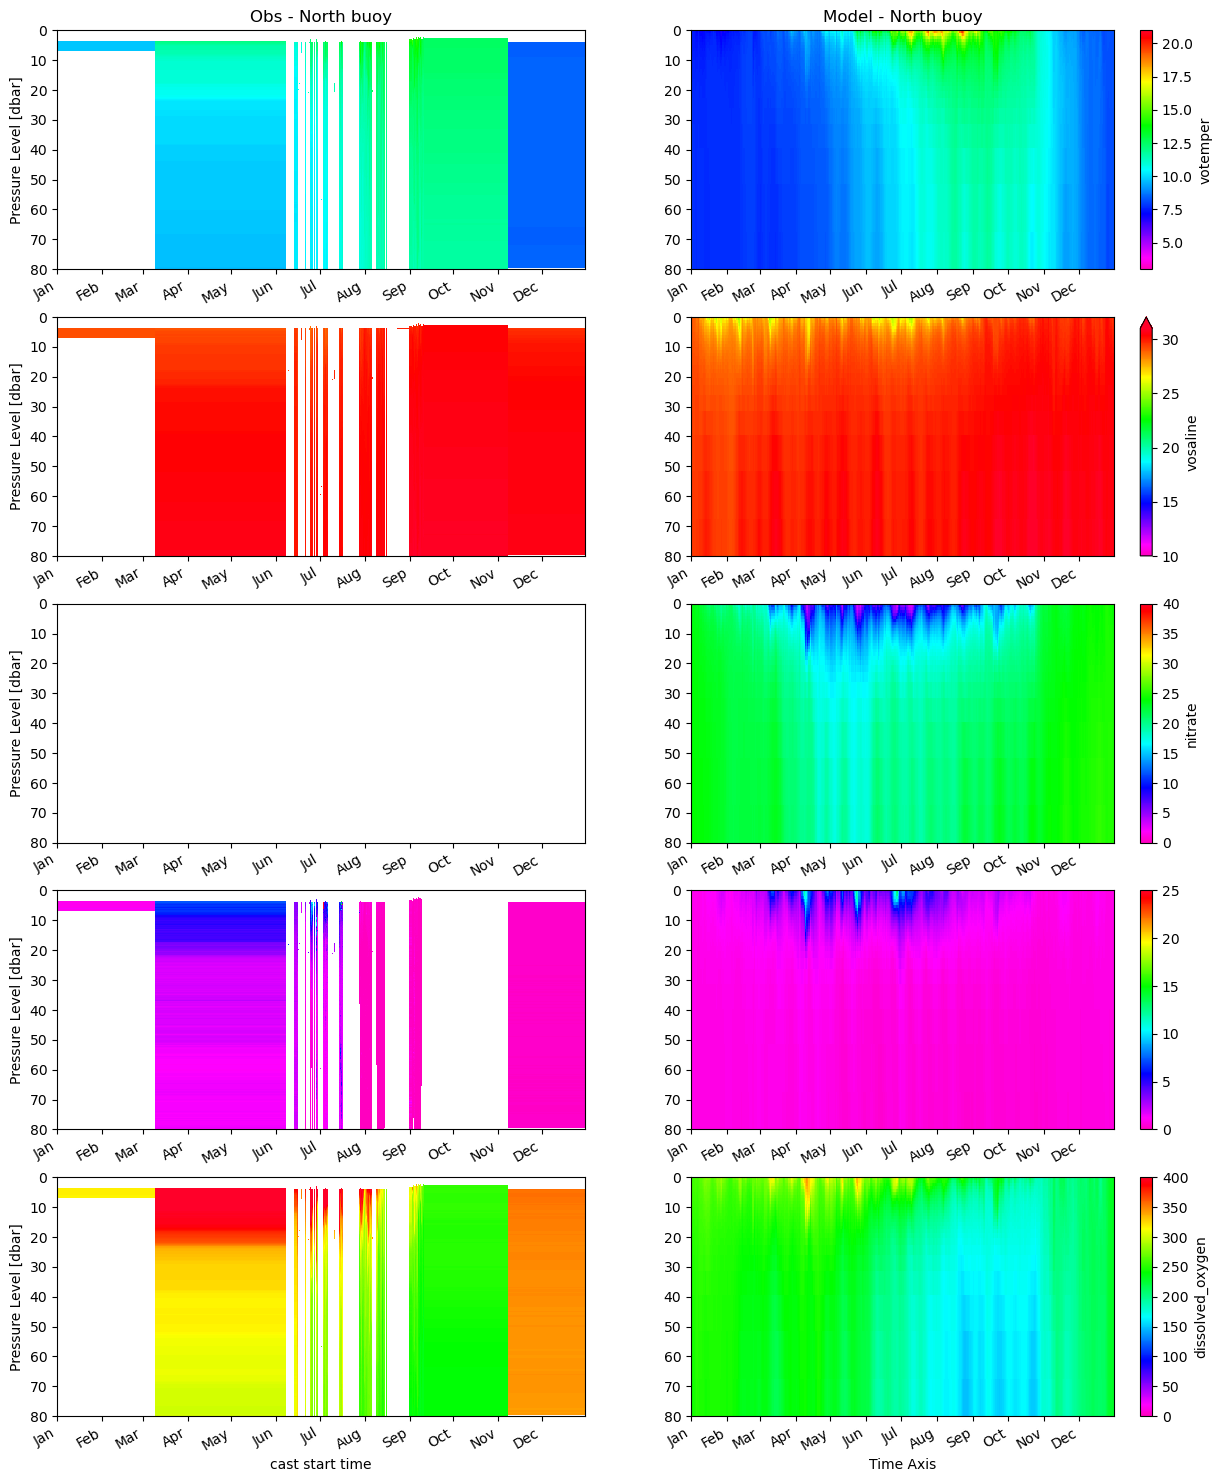

In [19]:
fig, ax = plt.subplots(5, 2, figsize=(15, 18))
temp_obs_NB.plot(ax=ax[0, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=3, vmax=21, ylim=(80, 0), xlim=(startdate, enddate));
salt_obs_NB.plot(ax=ax[1, 0], y="sea_water_pressure", yincrease=False, cmap= 'gist_rainbow_r', add_colorbar=False, vmin=10, vmax=31, ylim=(80, 0), xlim=(startdate, enddate));
no3_obs_NB.plot(ax=ax[2, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=0, vmax=40, ylim=(80, 0), xlim=(startdate, enddate));
chl_obs_NB.plot(ax=ax[3, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=0, vmax=25, ylim=(80, 0), xlim=(startdate, enddate));
oxy_obs_NB.plot(ax=ax[4, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=0, vmax=400, ylim=(80, 0), xlim=(startdate, enddate));

tempnb_ts.plot(ax=ax[0, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=3, vmax=21, ylim=(80, 0), xlim=(startdate, enddate));
saltnb_ts.plot(ax=ax[1, 1], y="deptht", yincrease=False, cmap= 'gist_rainbow_r', vmin=10, vmax=31, ylim=(80, 0), xlim=(startdate, enddate));
no3nb_ts.plot(ax=ax[2, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=0, vmax=40, ylim=(80, 0), xlim=(startdate, enddate));
chlnb_ts.plot(ax=ax[3, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=0, vmax=25, ylim=(80, 0), xlim=(startdate, enddate));
oxynb_ts.plot(ax=ax[4, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=0, vmax=400, ylim=(80, 0), xlim=(startdate, enddate));

ax[0, 1].set_ylabel('')
ax[1, 1].set_ylabel('')
ax[2, 1].set_ylabel('')
ax[3, 1].set_ylabel('')
ax[4, 1].set_ylabel('')
ax[0, 0].set_xlabel('')
ax[1, 0].set_xlabel('')
ax[2, 0].set_xlabel('')
ax[3, 0].set_xlabel('')
ax[0, 1].set_xlabel('')
ax[1, 1].set_xlabel('')
ax[2, 1].set_xlabel('')
ax[3, 1].set_xlabel('')

ax[0, 0].set_title('Obs - North buoy')
ax[0, 1].set_title('Model - North buoy')

# Make ticks on occurrences of each month:
ax[0, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[1, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[2, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[3, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[4, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[2, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[3, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[4, 1].xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[2, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[3, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[4, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[2, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[3, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[4, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

print('North buoy - Hood Canal', startdate, enddate)

Point Wells

Point Wells 2022-01-01T00:00:00+00:00 2022-12-31T00:00:00+00:00


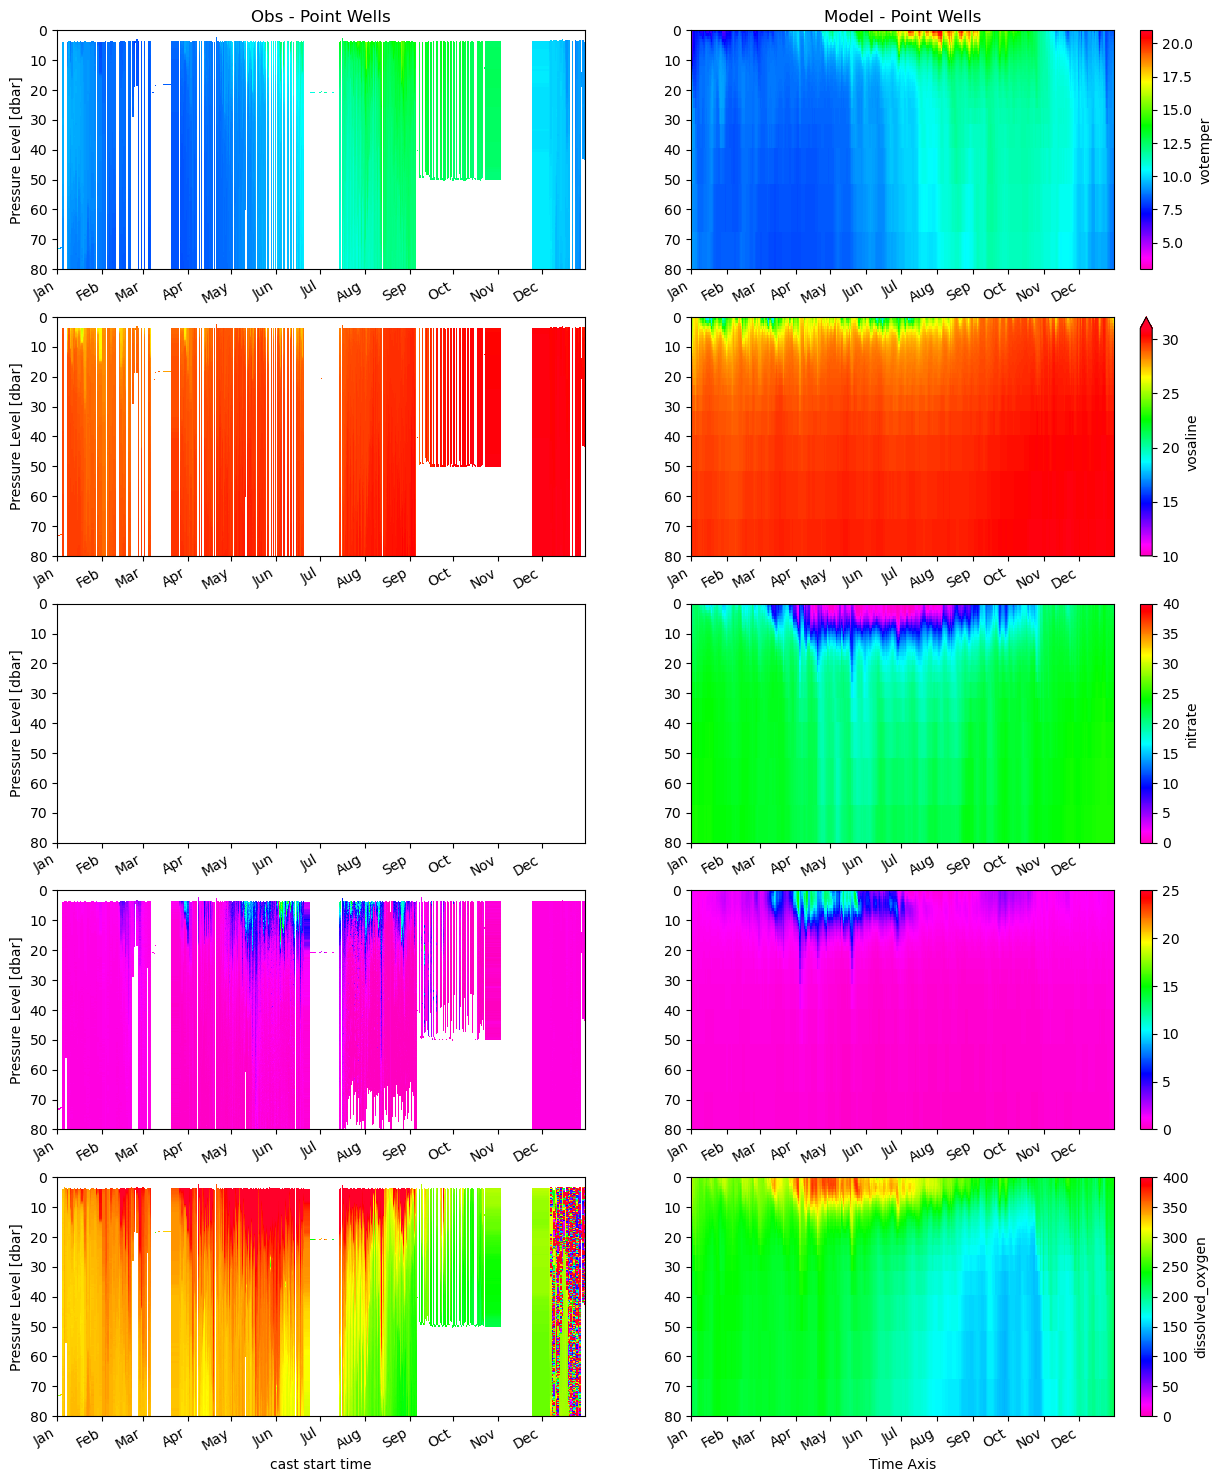

In [23]:
fig, ax = plt.subplots(5, 2, figsize=(15, 18))
temp_obs_PW.plot(ax=ax[0, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=3, vmax=21, ylim=(80, 0), xlim=(startdate, enddate));
salt_obs_PW.plot(ax=ax[1, 0], y="sea_water_pressure", yincrease=False, cmap= 'gist_rainbow_r', add_colorbar=False, vmin=10, vmax=31, ylim=(80, 0), xlim=(startdate, enddate));
no3_obs_PW.plot(ax=ax[2, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=0, vmax=40, ylim=(80, 0), xlim=(startdate, enddate));
chl_obs_PW.plot(ax=ax[3, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=0, vmax=25, ylim=(80, 0), xlim=(startdate, enddate));
oxy_obs_PW.plot(ax=ax[4, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=0, vmax=400, ylim=(80, 0), xlim=(startdate, enddate));

temppw_ts.plot(ax=ax[0, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=3, vmax=21, ylim=(80, 0), xlim=(startdate, enddate));
saltpw_ts.plot(ax=ax[1, 1], y="deptht", yincrease=False, cmap= 'gist_rainbow_r', vmin=10, vmax=31, ylim=(80, 0), xlim=(startdate, enddate));
no3pw_ts.plot(ax=ax[2, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=0, vmax=40, ylim=(80, 0), xlim=(startdate, enddate));
chlpw_ts.plot(ax=ax[3, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=0, vmax=25, ylim=(80, 0), xlim=(startdate, enddate));
oxypw_ts.plot(ax=ax[4, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=0, vmax=400, ylim=(80, 0), xlim=(startdate, enddate));

ax[0, 1].set_ylabel('')
ax[1, 1].set_ylabel('')
ax[2, 1].set_ylabel('')
ax[3, 1].set_ylabel('')
ax[4, 1].set_ylabel('')
ax[0, 0].set_xlabel('')
ax[1, 0].set_xlabel('')
ax[2, 0].set_xlabel('')
ax[3, 0].set_xlabel('')
ax[0, 1].set_xlabel('')
ax[1, 1].set_xlabel('')
ax[2, 1].set_xlabel('')
ax[3, 1].set_xlabel('')

ax[0, 0].set_title('Obs - Point Wells')
ax[0, 1].set_title('Model - Point Wells')

# Make ticks on occurrences of each month:
ax[0, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[1, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[2, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[3, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[4, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[2, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[3, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[4, 1].xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[2, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[3, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[4, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[2, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[3, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[4, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

print('Point Wells', startdate, enddate)

Carr Inlet

Carr Inlet 2022-01-01T00:00:00+00:00 2022-12-31T00:00:00+00:00


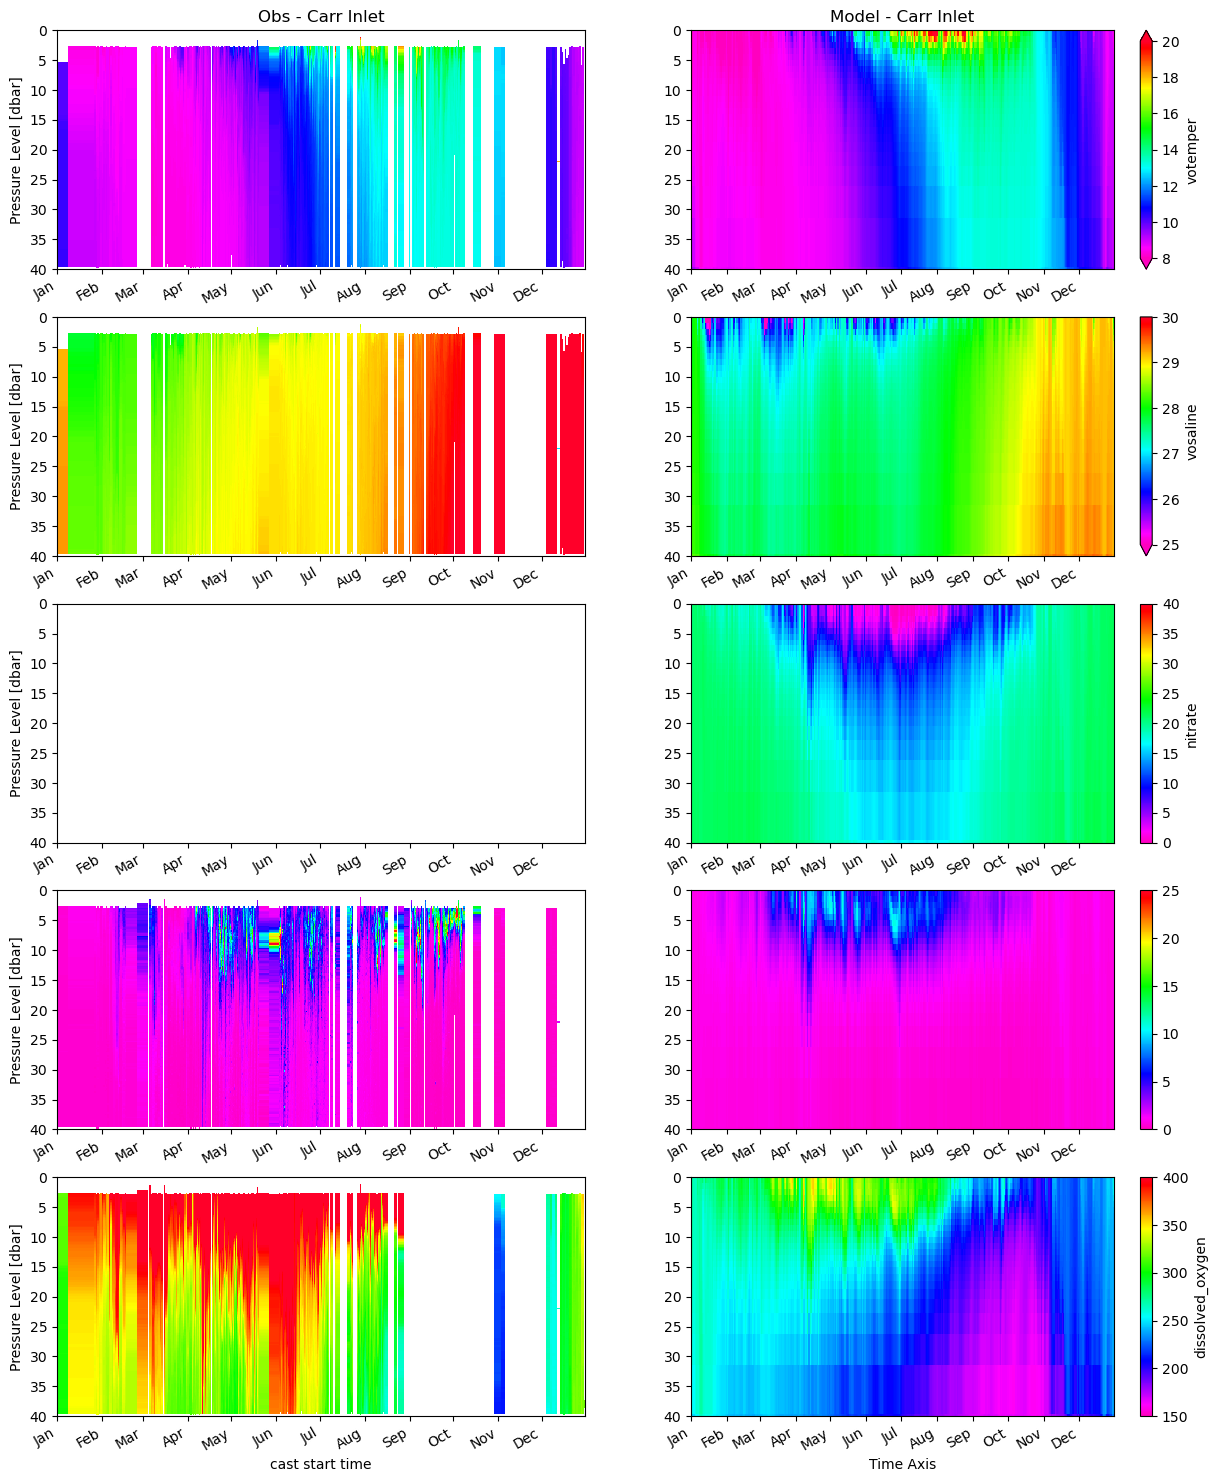

In [21]:
fig, ax = plt.subplots(5, 2, figsize=(15, 18))
temp_obs_CI.plot(ax=ax[0, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=8, vmax=20, ylim=(40, 0), xlim=(startdate, enddate));
salt_obs_CI.plot(ax=ax[1, 0], y="sea_water_pressure", yincrease=False, cmap= 'gist_rainbow_r', add_colorbar=False, vmin=25, vmax=30, ylim=(40, 0), xlim=(startdate, enddate));
no3_obs_CI.plot(ax=ax[2, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=0, vmax=40, ylim=(40, 0), xlim=(startdate, enddate));
chl_obs_CI.plot(ax=ax[3, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=0, vmax=25, ylim=(40, 0), xlim=(startdate, enddate));
oxy_obs_CI.plot(ax=ax[4, 0], y="sea_water_pressure", yincrease=False, cmap='gist_rainbow_r', add_colorbar=False, vmin=150, vmax=400, ylim=(40, 0), xlim=(startdate, enddate));

tempci_ts.plot(ax=ax[0, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=8, vmax=20, ylim=(40, 0), xlim=(startdate, enddate));
saltci_ts.plot(ax=ax[1, 1], y="deptht", yincrease=False, cmap= 'gist_rainbow_r', vmin=25, vmax=30, ylim=(40, 0), xlim=(startdate, enddate));
no3ci_ts.plot(ax=ax[2, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=0, vmax=40, ylim=(40, 0), xlim=(startdate, enddate));
chlci_ts.plot(ax=ax[3, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=0, vmax=25, ylim=(40, 0), xlim=(startdate, enddate));
oxyci_ts.plot(ax=ax[4, 1], y="deptht", yincrease=False, cmap='gist_rainbow_r', vmin=150, vmax=400, ylim=(40, 0), xlim=(startdate, enddate));

ax[0, 1].set_ylabel('')
ax[1, 1].set_ylabel('')
ax[2, 1].set_ylabel('')
ax[3, 1].set_ylabel('')
ax[4, 1].set_ylabel('')
ax[0, 0].set_xlabel('')
ax[1, 0].set_xlabel('')
ax[2, 0].set_xlabel('')
ax[3, 0].set_xlabel('')
ax[0, 1].set_xlabel('')
ax[1, 1].set_xlabel('')
ax[2, 1].set_xlabel('')
ax[3, 1].set_xlabel('')

ax[0, 0].set_title('Obs - Carr Inlet')
ax[0, 1].set_title('Model - Carr Inlet')

# Make ticks on occurrences of each month:
ax[0, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[1, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[2, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[3, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[4, 0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[2, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[3, 1].xaxis.set_major_locator(mdates.MonthLocator())
ax[4, 1].xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[2, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[3, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[4, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[0, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[2, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[3, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[4, 1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

print('Carr Inlet', startdate, enddate)